In [285]:
# Lawyers and economists birth distribution on DBpedia

In [287]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter


In [288]:
query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbp: <http://dbpedia.org/property/>

SELECT DISTINCT ?Person ?name (year(xsd:dateTime(?Birth_Date)) AS ?Year)
WHERE
{
       {?Person a dbo:Person .
        ?Person foaf:name ?name .
        ?Person dbo:nationality ?nationality .
        ?Person dbp:birthDate ?Birth_Date .
        ?Person dbo:abstract ?abstract .
        FILTER ( CONTAINS(?abstract, "jurist"))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)      
        }
       UNION
        {?Person a dbo:Person .
        ?Person foaf:name ?name .
        ?Person dbo:nationality ?nationality .
        ?Person dbp:birthDate ?dateOfBirth .
        ?Person dbo:abstract ?abstract .
        FILTER ( CONTAINS(?abstract, "Economist"))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        }
}
ORDER BY ?Year
"""

In [289]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql") ##, returnFormat=RDFXML)


In [290]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [291]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [292]:
# Nombre de lignes du résultat
len(rc['results']['bindings'])

858

### Analyse of the result

In [293]:
# Number of rows in the result
len(rc['results']['bindings'])

858

In [294]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/France_Prešeren'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'France Prešeren'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1800'}}
{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Dalmacio_Vélez_Sarsfield'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Dalmacio Vélez Sarsfield'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1800'}}
{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Wilhelm_Eduard_Wilda'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Wilhelm Eduard Wilda'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1800'}}
{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Noël_Delfosse'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Noël Delfosse'}, 'Year': {'type':

In [295]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        try: 
            name = l['name']['value']
            print([l['Person']['value'],name,l['Year']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['Person']['value'],name,l['Year']['value']])
            except :
                print([l['Person']['value'],'',l['Year']['value']])

        i += 1

['http://dbpedia.org/resource/France_Prešeren', 'France Prešeren', '1800']
['http://dbpedia.org/resource/Dalmacio_Vélez_Sarsfield', 'Dalmacio Vélez Sarsfield', '1800']
['http://dbpedia.org/resource/Wilhelm_Eduard_Wilda', 'Wilhelm Eduard Wilda', '1800']
['http://dbpedia.org/resource/Noël_Delfosse', 'Noël Delfosse', '1801']
['http://dbpedia.org/resource/William_Wood,_1st_Baron_Hatherley', 'The Lord Hatherley', '1801']


### Inspects years of birth and count the number of births per year

In [296]:
# Explore
yearsList = []
for l in rc['results']['bindings']:
    yearsList.append(l['Year']['value'])

In [297]:
min(yearsList), max(yearsList)

('1800', '1983')

In [298]:
yearsList.sort()

In [299]:
# Counts births per year
counterYearsList = Counter(yearsList)
groupedYearsList = list(zip(counterYearsList.keys(), counterYearsList.values()))

In [300]:
groupedYearsList[:50]

[('1800', 3),
 ('1801', 2),
 ('1802', 1),
 ('1805', 1),
 ('1806', 1),
 ('1808', 2),
 ('1809', 4),
 ('1810', 1),
 ('1811', 4),
 ('1812', 3),
 ('1814', 1),
 ('1815', 4),
 ('1816', 3),
 ('1817', 4),
 ('1818', 1),
 ('1819', 1),
 ('1820', 2),
 ('1821', 4),
 ('1822', 6),
 ('1823', 4),
 ('1824', 1),
 ('1825', 2),
 ('1826', 2),
 ('1827', 3),
 ('1828', 4),
 ('1829', 7),
 ('1830', 1),
 ('1831', 4),
 ('1832', 1),
 ('1833', 3),
 ('1834', 4),
 ('1835', 3),
 ('1837', 1),
 ('1838', 2),
 ('1839', 2),
 ('1841', 3),
 ('1842', 1),
 ('1843', 1),
 ('1844', 2),
 ('1845', 3),
 ('1846', 10),
 ('1847', 2),
 ('1848', 1),
 ('1849', 2),
 ('1850', 1),
 ('1851', 2),
 ('1852', 2),
 ('1853', 4),
 ('1854', 1),
 ('1855', 1)]

In [301]:
# Transforms years from string to integer
groupedYearsList = [[int(i[0]), i[1]] for i in groupedYearsList]

In [302]:
### Creates a list of five years period, i.e. the list of the first year of each period
d_list = []
period = 5
d_start = 1800
d_list.append(d_start)

i = 0
while i < 35:
    d_start = d_start + period
    d_list.append(d_start)
    i += 1

In [303]:
print(d_list[:2])
min(d_list), max(d_list)

[1800, 1805]


(1800, 1975)

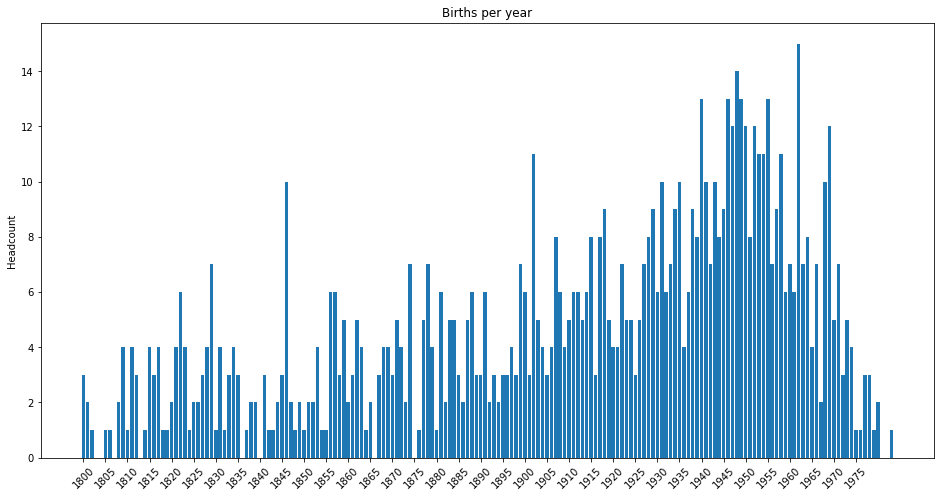

In [304]:
# Distribution per year
objects = [l[0] for l in groupedYearsList]
eff = [l[1] for l in groupedYearsList]

p1 = plt.bar(objects, eff)

plt.xticks(d_list)
plt.ylabel('Headcount')
plt.title('Births per year')
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

In [305]:
# Grouping by five year period
i_list = []
for i in d_list:
    i_n = 0
    for l in groupedYearsList:
        if l[0] >= i and l[0] < (i + 5):
            i_n = i_n + l[1]
    i_list.append([i, i_n])        

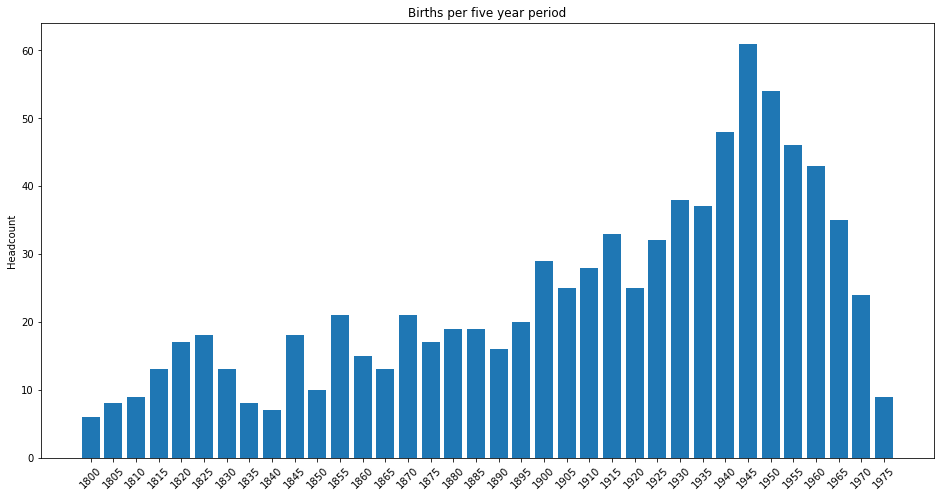

In [306]:
# Distribution by 5-year period

objects = [str(l[0]) for l in i_list]
eff = [l[1] for l in i_list]

p1 = plt.bar(objects, eff)

plt.ylabel('Headcount')
plt.title('Births per five year period')
plt.gcf().set_size_inches(16, 8)

plt.xticks(rotation=45)
plt.show()
